In [236]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sb
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import codecs

In [287]:
data = pd.read_json('../data.json').transpose() #Lee el json y le hace la transpuesta.

data.head()

,Product_URL,Brand,Description,URL_image,Color,Category_by_gender,title,price,retail_price,units_sold,rating,rating_count,tags,product_color,product_picture,idBusiness,concatedData
0,https://www.ajio.com/netplay-checked-polo-t-sh...,netplay,Checked Polo T-shirt,https://assets.ajio.com/medias/sys_master/root...,white,Men,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,100,3.76,54,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,https://contestimg.wish.com/api/webimage/5e9ae...,14,netplay Checked Polo T-shirt white Men 2020 Su...
1,https://www.ajio.com/netplay-tapered-fit-flat-...,netplay,Tapered Fit Flat-Front Trousers,https://assets.ajio.com/medias/sys_master/root...,navy,Men,SSHOUSE Summer Casual Sleeveless SoirÃ©e Party...,8.0,22,20000,3.45,6135,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,https://contestimg.wish.com/api/webimage/58940...,4,netplay Tapered Fit Flat-Front Trousers navy M...
2,https://www.ajio.com/the-indian-garage-co-stri...,the-indian-garage-co,Striped Slim Fit Shirt with Patch Pocket,https://assets.ajio.com/medias/sys_master/root...,white,Men,2020 Nouvelle ArrivÃ©e Femmes Printemps et Ãt...,8.0,43,100,3.57,14,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,https://contestimg.wish.com/api/webimage/5ea10...,20,the-indian-garage-co Striped Slim Fit Shirt wi...
3,https://www.ajio.com/performax-heathered-crew-...,performax,Heathered Crew-Neck T-shirt,https://assets.ajio.com/medias/sys_master/root...,charcoal,Men,Hot Summer Cool T-shirt pour les femmes Mode T...,8.0,8,5000,4.03,579,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,https://contestimg.wish.com/api/webimage/5cedf...,16,performax Heathered Crew-Neck T-shirt charcoal...
4,https://www.ajio.com/john-players-jeans-washed...,john-players-jeans,Washed Skinny Fit Jeans with Whiskers,https://assets.ajio.com/medias/sys_master/root...,jetblack,Men,Femmes Shorts d'Ã©tÃ© Ã lacets taille Ã©lasti...,2.72,3,100,3.1,20,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,https://contestimg.wish.com/api/webimage/5ebf5...,3,john-players-jeans Washed Skinny Fit Jeans wit...


In [293]:
numbers = []
def setIndexToRow():
    for i in range(len(data)):
        numbers.append(i)
    data['index'] = numbers
setIndexToRow()
data['index']


0          0
1          1
2          2
3          3
4          4
        ... 
1495    1495
1496    1496
1497    1497
1498    1498
1499    1499
Name: index, Length: 1500, dtype: int64

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


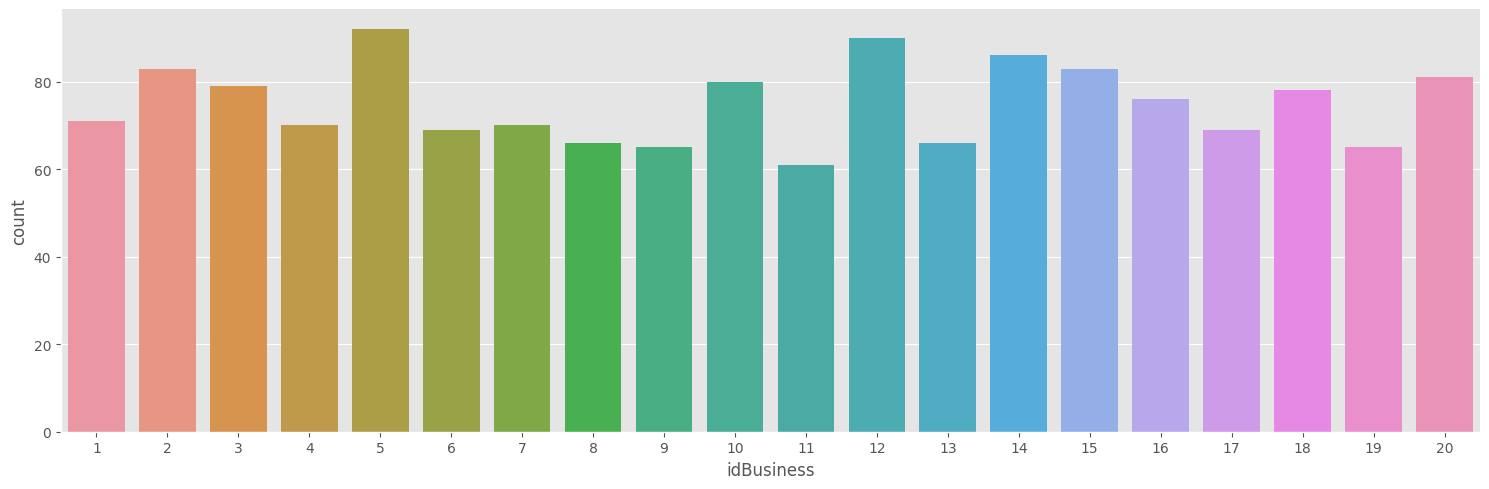

In [239]:
sb.factorplot('idBusiness',data=data,kind="count", aspect=3) #Grafica de cantidad de productos por cada tienda.

In [240]:
data.columns

Index(['Product_URL', 'Brand', 'Description', 'URL_image', 'Color',
       'Category_by_gender', 'title', 'price', 'retail_price', 'units_sold',
       'rating', 'rating_count', 'tags', 'product_color', 'product_picture',
       'idBusiness', 'concatedData'],
      dtype='object')

Workign with brands

In [241]:
brands = {}
#Obtener todas las marcas disponibles
for index, row in data.iterrows():
    if row['Brand'] in brands:
        pass
    else:
        brands[row['Brand']] = row["Brand"]


In [242]:
arrayBrands = brands.keys() 
arrayBrands

dict_keys(['netplay', 'the-indian-garage-co', 'performax', 'john-players-jeans', 'dennislingo-premium-attire', 'teamspirit', 'ardeur', 'campus-sutra', 'dnmx', 'puma', 'john-players', 'nike', 'lee-cooper', 'hj-hasasi', 'ausk', 'levis', 'adidas', 'trends-tower', 'stellers', 'see-designs', 'pepe-jeans', 'jockey', 'u-s-polo-assn-', 'dillinger', 'clafoutis', 'armani-exchange', 'bene-kleed', 'ivoc', 'mchenry', 'british-club', 'fort-collins', 'glito', 'superdry', 'spykar', 'huetrap', 'polo-plus', 'adidas-originals', 'max', 'hubberholme', 'vogueorgy', 'ecko', 'calvin-klein-jeans', 'fashionfricks', 'gas', 'proline', 'marks-spencer', 'produkt-by-jack-jones', 'fila', 'gespo', 'the-bear-house', 'ketch', 'bullmer', 'louis-philippe', 'instafab-plus', 'rigo', 'kappa', 'maniac', 'urban-scottish', 'sports-52-wear', 'american-eagle-outfitters', 'breakbounce', 't-tabard', 'damensch', 'brooks-brothers', 'difference-of-opinion', 'revs', 'tommy-hilfiger', 'wild-west', 'ajio', 'french-connection', 'dollar', 

In [243]:
def binaryList(brandInput):
    arr = []
    for brand in arrayBrands:
        if(brandInput == brand):
            arr.append(1)
        else:
            arr.append(0)
    return arr


Working with colors

In [244]:
data['brand_bin'] = data['Brand'].apply(lambda x: binaryList(x))
data['brand_bin'].head()

0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: brand_bin, dtype: object

In [246]:
colors = {}
#Obtener todas las marcas disponibles
for index, row in data.iterrows():
    if row['Color'] in colors:
        colors[row['Color']] =colors[row['Color']] + 1
    else:
        colors[row['Color']] = 1
arrayColors = colors.keys()


In [249]:
def binaryListColor(colorInput):
    arr = []
    for color in arrayColors:
        if(colorInput == color):
            arr.append(1)
        else:
            arr.append(0)
    return arr

In [250]:
data['color_bin'] = data['Color'].apply(lambda x: binaryListColor(x))
data['color_bin'].head()

0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: color_bin, dtype: object

Working with tags


In [251]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [223]:
wordsSeries = data['tags']
wordsSeries

0       Summer,Fashion,womenunderwearsuit,printedpajam...
1       Mini,womens dresses,Summer,Patchwork,fashion d...
2       Summer,cardigan,women beachwear,chiffon,Sexy w...
3       Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...
4       Summer,Plus Size,Lace,Casual pants,Bottom,pant...
                              ...                        
1495    Summer,Plus Size,Necks,chiffon,chiffon dress,D...
1496    Summer,Plus Size,Fashion,Sleeve,Tops,Loose,sho...
1497    Sterling,Summer,Fashion,Rose Gold Ring,gold,Si...
1498    Mini,Strapless Dress,Fashion,Summer,Tube top,T...
1499    Summer,Fashion,Lace,pants,fashion pants,summer...
Name: tags, Length: 1500, dtype: object

In [252]:
def splitElement(element):
    arr = element.split(",")
    return arr

In [253]:
stop_words = set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')
#words = data['tags'].dropna().apply(nltk.word_tokenize)
wordsByRow = data['tags'].dropna().apply(lambda x: splitElement(x))
word=[]
# for i in words:
# word.extend(i)
# word=pd.Series(word)
# word=([i for i in word.str.lower() if i not in stop_words])
# wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)

In [254]:
allTags = {}
for  arrayWords in wordsByRow:
    for word in arrayWords:
        if word in allTags:
            allTags[word] = allTags[word] + 1
        else:
            allTags[word] = 1
allTagsArray = allTags.keys()



In [255]:
allTags = []
for tag in allTagsArray:
    allTags.append(tag)
allTags

['Summer',
 'Fashion',
 'womenunderwearsuit',
 'printedpajamasset',
 'womencasualshort',
 "Women's Fashion",
 'flamingo',
 'loungewearset',
 'Casual',
 'Shirt',
 'casualsleepwear',
 'Shorts',
 'flamingotshirt',
 'Elastic',
 'Vintage',
 'Tops',
 'tshirtandshortsset',
 'Women',
 'Sleepwear',
 'Print',
 'womenpajamasset',
 'womennightwear',
 'Pajamas',
 'womensleepwearset',
 'Mini',
 'womens dresses',
 'Patchwork',
 'fashion dress',
 'Dress',
 'Mini dress',
 'Women S Clothing',
 'backless',
 'party',
 'summer dresses',
 'sleeveless',
 'sexy',
 'cardigan',
 'women beachwear',
 'chiffon',
 'Sexy women',
 'Coat',
 'summercardigan',
 'openfront',
 'short sleeves',
 'Swimsuit',
 'leaf',
 'Green',
 'printed',
 'Spring',
 'longcardigan',
 'Beach',
 'kimono',
 'Cotton',
 'Cotton T Shirt',
 'Sleeve',
 'printedletterstop',
 'Clothing',
 'Necks',
 'Women Clothing',
 'tshirtforwomen',
 'T Shirts',
 'Plus Size',
 'Lace',
 'Casual pants',
 'Bottom',
 'pants',
 'Loose',
 'Lace Up',
 'Deep V-Neck',
 'Spa

In [256]:
wordsByRow

0       [Summer, Fashion, womenunderwearsuit, printedp...
1       [Mini, womens dresses, Summer, Patchwork, fash...
2       [Summer, cardigan, women beachwear, chiffon, S...
3       [Summer, Shorts, Cotton, Cotton T Shirt, Sleev...
4       [Summer, Plus Size, Lace, Casual pants, Bottom...
                              ...                        
1495    [Summer, Plus Size, Necks, chiffon, chiffon dr...
1496    [Summer, Plus Size, Fashion, Sleeve, Tops, Loo...
1497    [Sterling, Summer, Fashion, Rose Gold Ring, go...
1498    [Mini, Strapless Dress, Fashion, Summer, Tube ...
1499    [Summer, Fashion, Lace, pants, fashion pants, ...
Name: tags, Length: 1500, dtype: object

In [257]:
totalArr = []
for row in wordsByRow:
    arr = np.empty(len(allTagsArray))
    arr.fill(0)
    for word in row:
        for tagArrayWord in allTags:
            if (word == tagArrayWord):
                arr[allTags.index(tagArrayWord)] = 1
    totalArr.append(arr)
totalArr



[array([1., 1., 1., ..., 0., 0., 0.]),
 array([1., 0., 0., ..., 0., 0., 0.]),
 array([1., 0., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 0., 0., ..., 0., 0., 0.]),
 array([1., 0., 0., ..., 0., 0., 0.]),
 array([0., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 0., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([0., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 0., 0., ..., 0., 0., 0.]),
 array([0., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 

In [258]:
len(totalArr)

1500

In [259]:
data['bin_keywords'] = totalArr

In [260]:
data.head()

,Product_URL,Brand,Description,URL_image,Color,Category_by_gender,title,price,retail_price,units_sold,rating,rating_count,tags,product_color,product_picture,idBusiness,concatedData,brand_bin,color_bin,bin_keywords
0,https://www.ajio.com/netplay-checked-polo-t-sh...,netplay,Checked Polo T-shirt,https://assets.ajio.com/medias/sys_master/root...,white,Men,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,100,3.76,54,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,https://contestimg.wish.com/api/webimage/5e9ae...,14,netplay Checked Polo T-shirt white Men 2020 Su...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,https://www.ajio.com/netplay-tapered-fit-flat-...,netplay,Tapered Fit Flat-Front Trousers,https://assets.ajio.com/medias/sys_master/root...,navy,Men,SSHOUSE Summer Casual Sleeveless SoirÃ©e Party...,8.0,22,20000,3.45,6135,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,https://contestimg.wish.com/api/webimage/58940...,4,netplay Tapered Fit Flat-Front Trousers navy M...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, ..."
2,https://www.ajio.com/the-indian-garage-co-stri...,the-indian-garage-co,Striped Slim Fit Shirt with Patch Pocket,https://assets.ajio.com/medias/sys_master/root...,white,Men,2020 Nouvelle ArrivÃ©e Femmes Printemps et Ãt...,8.0,43,100,3.57,14,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,https://contestimg.wish.com/api/webimage/5ea10...,20,the-indian-garage-co Striped Slim Fit Shirt wi...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
3,https://www.ajio.com/performax-heathered-crew-...,performax,Heathered Crew-Neck T-shirt,https://assets.ajio.com/medias/sys_master/root...,charcoal,Men,Hot Summer Cool T-shirt pour les femmes Mode T...,8.0,8,5000,4.03,579,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,https://contestimg.wish.com/api/webimage/5cedf...,16,performax Heathered Crew-Neck T-shirt charcoal...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
4,https://www.ajio.com/john-players-jeans-washed...,john-players-jeans,Washed Skinny Fit Jeans with Whiskers,https://assets.ajio.com/medias/sys_master/root...,jetblack,Men,Femmes Shorts d'Ã©tÃ© Ã lacets taille Ã©lasti...,2.72,3,100,3.1,20,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,https://contestimg.wish.com/api/webimage/5ebf5...,3,john-players-jeans Washed Skinny Fit Jeans wit...,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, ..."


In [274]:
from scipy import spatial
def Similarity(title1, title2):
    a = data.iloc[title1]
    b = data.iloc[title2]
    brandsA = a['brand_bin']
    brandsB = b['brand_bin']
    brandDistance = spatial.distance.cosine(brandsA, brandsB)
    
    colorA = a['color_bin']
    colorB = b['color_bin']
    colorDistance = spatial.distance.cosine(colorA, colorB)
    
    keyWordsA = a['bin_keywords']
    keyWordsB = b['bin_keywords']

    keyWordsDistance = spatial.distance.cosine(keyWordsA, keyWordsB)
    print(brandDistance  + colorDistance + keyWordsDistance)
    return brandDistance  + colorDistance + keyWordsDistance



In [296]:
import operator
def predict_score():
    # name = input('Enter a product title: ')
    name = "Women Fashion Loose Lace Blouse Blouse V Neck Bat Sleeves T Shirt Hollow Out Tops Plus Grande Taille XS-8XL"
    print(name)
    new_product = data[data['title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected product: ',new_product.title.values[0])

    def getNeighbors(baseProduct, K):
        print("HOLA")
        distances = []
        for index, product in data.iterrows():
            if product['index'] != baseProduct['index'].values[0]:
                dist = Similarity(baseProduct['index'].values[0], product['index'])
                distances.append((product['index'], dist))
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_product, K)

    print('\nRecommended products: \n')
    for neighbor in neighbors:
        print(data.iloc[neighbor[0]]['title'])
        # avgRating = avgRating+ data.iloc[neighbor[0]][2]
        # print( data.iloc[neighbor[0]][0]+" | Genres: "+str(data.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+str(data.iloc[neighbor[0]][2]))
    
    # print('\n')
    # avgRating = avgRating/K 
    # print('The predicted rating for %s is: %f' %(new_product['title'].values[0],avgRating))
    # print('The actual rating for %s is %f' %(new_product['title'].values[0],new_product['vote_average']))

In [297]:
predict_score()
# data.iloc[6]

Women Fashion Loose Lace Blouse Blouse V Neck Bat Sleeves T Shirt Hollow Out Tops Plus Grande Taille XS-8XL
Selected product:  Women Fashion Loose Lace Blouse Blouse V Neck Bat Sleeves T Shirt Hollow Out Tops Plus Grande Taille XS-8XL
HOLA
6


KeyError: 'brand_bin'